# Project goal :
To try and understand the fate of pronouns upon backtranslation using Google translate.

## Notebook goals
- Read in the data-frames entailing the languages supported and the senetnce list spanning 86 professions
- Generate the $86 \times (2 N_{lang}+1)$ matrix of translations and back-translations across the $N_{lang}$ languages being offered by the Google translate API
( As of time of authoring this, $N_{lang}=109, {N_{cols}}=219 = 109 \times 2 +1) $
- Perform the Survival rates of the pronouns for the languages


# Step-1: The basic imports

In [1]:
import sys
import os
from tqdm import tqdm_notebook
from google.colab import drive
import importlib
importlib.reload(sys)
#######################
# # Enter your own proj_dir here to save the results
# drive.flush_and_unmount()
# drive.mount('/gdrive', force_remount=True)
# proj_dir='/gdrive/My Drive/Colab Notebooks/*****'
# os.chdir(proj_dir)
#############################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Cleanliness of displays
np.set_printoptions(suppress=True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%precision 3

'%.3f'

# Step-2: Raw data fetch from the github repo

- The sentence list covering all the professions considered
- The language list(s) supported on Google translate

In [2]:
url_sentences='https://raw.githubusercontent.com/vinayprabhu/translate_bias/main/Data/df_professions_86.csv'
list_sentence_she=list(pd.read_csv(url_sentences)['sentence'].values)
list_sentence_she

['She is an advocate.',
 'She is an agriculturist.',
 'She is an aircraft pilot.',
 'She is an artist.',
 'She is an astronomer.',
 'She is an attorney.',
 'She is an audiologist.',
 'She is a banker.',
 'She is a barber.',
 'She is a bartender.',
 'She is a biologist.',
 'She is a bookkeeper.',
 'She is a botanist.',
 'She is a builder.',
 'She is a businessperson.',
 'She is a butcher.',
 'She is a carpenter.',
 'She is a cashier.',
 'She is a chef.',
 'She is a chemist.',
 'She is a clergy advisor.',
 'She is a clinical lab technician.',
 'She is a coach.',
 'She is a developer.',
 'She is a dietitian.',
 'She is an ecologist.',
 'She is an editor.',
 'She is an electrician.',
 'She is an EMT specialist.',
 'She is a farmer.',
 'She is a filmmaker.',
 'She is a firefighter.',
 'She is a fisherman.',
 'She is a flight attendant.',
 'She is a geneticist.',
 'She is a geologist.',
 'She is a graphic designer.',
 'She is a human resource specialist.',
 'She is an immunologist.',
 'She i

In [3]:
# url_lang_109='https://raw.githubusercontent.com/vinayprabhu/translate_bias/main/Data/df_gt_languages_109.csv'
url_lang_indian='https://raw.githubusercontent.com/vinayprabhu/translate_bias/main/Data/df_gt_languages_indian.csv'
df_lang=pd.read_csv(url_lang_indian)
df_lang

,Language,ISO-639-1 Code
0,Bengali,bn
1,Gujarati,gu
2,Hindi,hi
3,Kannada,kn
4,Malayalam,ml
5,Marathi,mr
6,Nepali,ne
7,Oriya,or
8,Punjabi,pa
9,Sindhi,sd


# Step-3: Author function to perform back-translation using the deep_translator PyPi python package

Pro-tip: Comment out line# 179 
```
# print("sentence number ", i+1, " has been translated successfully")
```

In [4]:
!pip install -U -q deep_translator
from deep_translator import GoogleTranslator
translated = GoogleTranslator(source='auto', target='en').translate('वे एक डॉक्टर हैं')  
print(f'वे एक डॉक्टर हैं --> {translated}')

वे एक डॉक्टर हैं --> he is a doctor


In [5]:
import os
if not os.path.exists('./npy_temp/'):
  os.makedirs('./npy_temp/')

In [6]:
def backtranslate_lang(lang,list_input=list_sentence_she):
  # Step-1: Foward-translation from English to the target language 
  N_input=len(list_input)
  translated_en_lang=['']*N_input
  print(lang)
  try:
    translated_en_lang = GoogleTranslator('en', lang).translate_batch(list_input)
    # Cache the intermediate results
    np.save(f'./npy_temp/translated_en_{lang}.npy',np.array(translated_en_lang))
  except:
    print((translated_en_lang=='').sum())
    pass

  # Step-2: Back-translation from the target language to English
  translated_lang_en=['']*N_input

  try:
    translated_lang_en = GoogleTranslator(lang,'en').translate_batch(translated_en_lang)
    np.save(f'./npy_temp/translated_{lang}_en.npy',np.array(translated_lang_en))
  except:
    print((translated_lang_en=='').sum())
    pass

  df_lang=pd.DataFrame(columns=[f'En2{lang}',f'{lang}2En'])
  df_lang[f'En2{lang}']=translated_en_lang
  df_lang[f'{lang}2En']=translated_lang_en
  return df_lang

In [7]:
list_lang=list(df_lang.iloc[:,1].values)
list_lang

['bn', 'gu', 'hi', 'kn', 'ml', 'mr', 'ne', 'or', 'pa', 'sd', 'ta', 'te', 'ur']

# Step-4: For-loop over all the languages to generate the back-translate matrix

```
##################################################################
df_translate=pd.DataFrame(data=list_sentence_she,columns=['original'])
for lang in tqdm_notebook(list_lang):
  try:
    df_lang=backtranslate_lang(lang,list_input=list_sentence_she)
    df_translate=pd.concat([df_translate, df_lang], axis=1)
    print(df_translate.shape)
    df_translate.to_csv('df_bt_prof_she.csv',index=False)
  except:
    # print(f'{lang} incomplete!')
    pass
 
df_translate.to_csv('df_bt_prof_she.csv',index=False)
##################################################################
```

In [8]:
url_they='https://raw.githubusercontent.com/vinayprabhu/translate_bias/main/Data/df_bt_they_indian.csv'
url_she='https://raw.githubusercontent.com/vinayprabhu/translate_bias/main/Data/df_bt_she_indian.csv'
df_she=pd.read_csv(url_she)
df_they=pd.read_csv(url_they)
df_she

,original,En2bn,bn2En,En2gu,gu2En,En2hi,hi2En,En2kn,kn2En,En2ml,ml2En,En2mr,mr2En,En2ne,ne2En,En2pa,pa2En,En2sd,sd2En,En2ta,ta2En,En2te,te2En,En2ur,ur2En
0,She is an advocate.,তিনি একজন অ্যাডভোকেট।,He is an advocate.,તે એક એડવોકેટ છે.,He is an advocate.,वह एक वकील हैं।,He is a lawyer.,ಅವಳು ವಕೀಲ.,She is a lawyer.,അവൾ ഒരു അഭിഭാഷകയാണ്.,She is a lawyer.,ती एक वकील आहे.,She is a lawyer.,उनी एक वकिल हुन्।,He is a lawyer.,ਉਹ ਇੱਕ ਵਕੀਲ ਹੈ.,He is a lawyer.,هوءَ وڪيل آهي.,She is a lawyer,அவள் ஒரு வக்கீல்.,She is a lawyer.,ఆమె న్యాయవాది.,She is a lawyer.,وہ ایک وکیل ہے۔,He is a lawyer.
1,She is an agriculturist.,তিনি একজন কৃষিবিদ।,He is an agriculturist.,તે એક કૃષિવિજ્ .ાની છે.,He is an agronomist.,वह एक कृषक हैं।,He is a farmer.,ಅವಳು ಕೃಷಿಕ.,She is a farmer.,അവൾ ഒരു കൃഷിക്കാരിയാണ്.,She is a farmer.,ती एक कृषक आहे.,She is a farmer.,उनी एक कृषिविद् हुन्।,He is an agriculturist.,ਉਹ ਇੱਕ ਖੇਤੀਬਾੜੀ ਹੈ.,He is an agriculturist.,هوءَ زراعت ڪندڙ آهي.,She is a farmer.,அவள் ஒரு விவசாயி.,She is a farmer.,ఆమె వ్యవసాయదారుడు.,She is a farmer.,وہ ایک زراعت پسند ہے۔,He is an agriculturist.
2,She is an aircraft pilot.,তিনি একজন বিমানের পাইলট।,He is an aircraft pilot.,તે એક વિમાન પાઇલટ છે.,He is an aircraft pilot.,वह एक एयरक्राफ्ट पायलट हैं।,He is an aircraft pilot.,ಅವಳು ವಿಮಾನ ಪೈಲಟ್.,She’s a flight pilot.,അവൾ ഒരു വിമാന പൈലറ്റാണ്.,She is an airline pilot.,ती विमानाची पायलट आहे.,She is the pilot of the aircraft.,उनी एक विमान पायलट हुन्।,He is a pilot.,ਉਹ ਇਕ ਏਅਰਕ੍ਰਾਫਟ ਪਾਇਲਟ ਹੈ।,He is an aircraft pilot.,هوءَ جهاز جو پائلٽ آهي.,She is an aircraft pilot.,அவர் ஒரு விமான பைலட்.,He is an airline pilot.,ఆమె విమాన పైలట్.,She is a flight pilot.,وہ ایک ہوائی جہاز کا پائلٹ ہے۔,He is the pilot of an airplane.
3,She is an artist.,সে একজন শিল্পী.,He is an artist.,તે એક કલાકાર છે.,He is an artist.,वह एक कलाकार है।,she's an artist.,ಅವಳು ಕಲಾವಿದೆ.,She is an artist.,അവൾ ഒരു കലാകാരിയാണ്.,She is an artist.,ती एक कलाकार आहे.,She is an artist.,उनी एक कलाकार हुन्।,He is an artist.,ਉਹ ਇੱਕ ਕਲਾਕਾਰ ਹੈ.,He is an artist.,هوءَ فنڪار آهي.,She is an artist,அவள் ஒரு கலைஞன்.,She is an artist.,ఆమె ఆర్టిస్ట్.,She is an artist.,وہ ایک فنکار ہے۔,She is an artist.
4,She is an astronomer.,তিনি একজন জ্যোতির্বিদ।,He is an astronomer.,તે એક ખગોળશાસ્ત્રી છે.,He is an astronomer.,वह एक खगोलशास्त्री हैं।,He is an astronomer.,ಅವಳು ಖಗೋಳ ವಿಜ್ಞಾನಿ.,She is an astronomer.,അവൾ ഒരു ജ്യോതിശാസ്ത്രജ്ഞയാണ്.,She is an astronomer.,ती एक खगोलशास्त्रज्ञ आहे.,She is an astronomer.,उनी खगोलविद् हुन्।,He is an astronomer.,ਉਹ ਇੱਕ ਖਗੋਲ ਵਿਗਿਆਨੀ ਹੈ.,He is an astronomer.,هوءَ ڪلاسيڪل آهي.,She is classical,அவள் ஒரு வானியலாளர்.,She is an astronomer.,ఆమె ఖగోళ శాస్త్రవేత్త.,She is an astronomer.,وہ ایک ماہر فلکیات ہیں۔,He is an astronomer.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,She is a visual artist.,তিনি একজন ভিজ্যুয়াল আর্টিস্ট।,He is a visual artist.,તે દ્રશ્ય કલાકાર છે.,He is a visual artist.,वह एक दृश्य कलाकार हैं।,He is a visual artist.,ಅವಳು ದೃಶ್ಯ ಕಲಾವಿದೆ.,She is a visual artist.,അവൾ ഒരു വിഷ്വൽ ആർട്ടിസ്റ്റാണ്.,She is a visual artist.,ती एक दृश्य कलाकार आहे.,She is a visual artist.,उनी एक दृश्य कलाकार हुन्।,He is a visual artist.,ਉਹ ਇਕ ਦਰਸ਼ਨੀ ਕਲਾਕਾਰ ਹੈ.,He is a visual artist.,هوءَ هڪ تصويري مصور آهي.,She is a portrait artist.,அவர் ஒரு காட்சி கலைஞர்.,He is a visual artist.,ఆమె విజువల్ ఆర్టిస్ట్.,She is a visual artist.,وہ ایک بصری فنکار ہے۔,She is a visual artist.
82,She is a waiter.,তিনি একজন ওয়েটার।,He is a waiter.,તે વેઈટર છે.,He is a waiter.,वह एक वेटर है।,he is a waiter.,ಅವಳು ಮಾಣಿ.,She's the waiter.,അവൾ ഒരു വെയിറ്ററാണ്.,She is a waiter.,ती एक वेटर आहे.,She is a waiter.,उनी एक वेटर हुन्।,He is a waiter.,ਉਹ ਇੱਕ ਵੇਟਰ ਹੈ.,He is a waiter.,هوءَ ويٽر آهي.,She is the waiter,அவள் ஒரு பணியாளர்.,She is an employee.,ఆమె వెయిటర్.,She is a waiter.,وہ ایک ویٹر ہے۔,She is a waiter.
83,She is a web designer.,তিনি একজন ওয়েব ডিজাইনার।,He is a web designer.,તે વેબ ડિઝાઇનર છે.,She is a web designer.,वह एक वेब डिजाइनर हैं।,He is a web designer.,ಅವಳು ವೆಬ್ ಡಿಸೈನರ್.,She is a web de

# Step-5: Pronoun survival rate analysis

Oriya not processed!


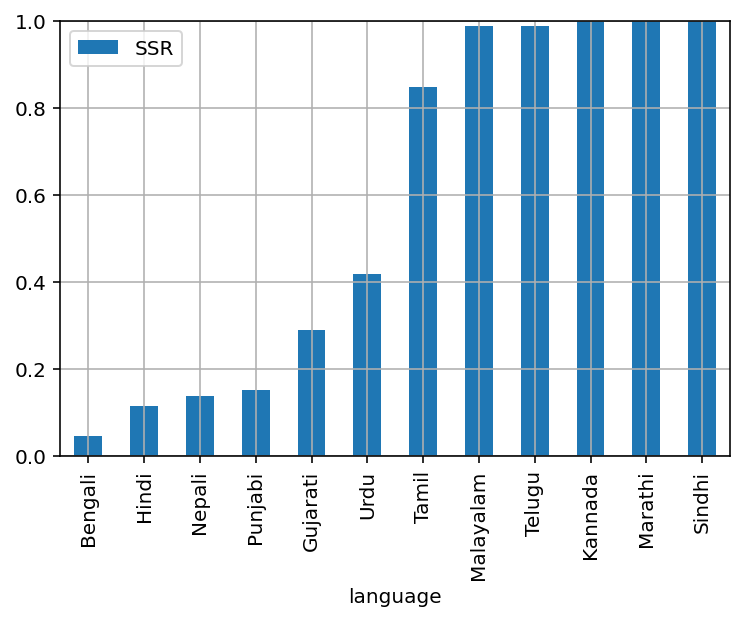

In [9]:
df_SSR=pd.DataFrame(columns=['language','SSR'])
i=0
for lang in list_lang:
  try:
    SSR_lang=df_she.loc[:,lang+'2En'].apply(lambda x:x.split(' ')[0][0:3].lower()=='she').mean()
    df_SSR.loc[i,'language']=df_lang.loc[df_lang.iloc[:,1]==lang,'Language'].values[0]
    df_SSR.loc[i,'SSR']=SSR_lang
    i+=1

  except: 
    lang_=df_lang.loc[df_lang.iloc[:,1]==lang,'Language'].values[0]
    print(f'{lang_} not processed!')

df_SSR.sort_values(by='SSR').plot(x='language',kind='bar')
plt.grid('On')
plt.ylim([0,1]);
plt.savefig("SSR_indian.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [10]:
df_tsr=pd.DataFrame(columns=['language','TSR'])
i=0
for lang in list_lang:
  try:
    TSR_lang=df_they.loc[:,lang+'2En'].apply(lambda x:x.split(' ')[0][0:4].lower()=='they').mean()
    df_tsr.loc[i,'language']=df_lang.loc[df_lang.iloc[:,1]==lang,'Language'].values[0]
    df_tsr.loc[i,'TSR']=TSR_lang
    i+=1

  except: 
    lang_=df_lang.loc[df_lang.iloc[:,1]==lang,'Language'].values[0]
    print(f'{lang_} not processed!')

Oriya not processed!


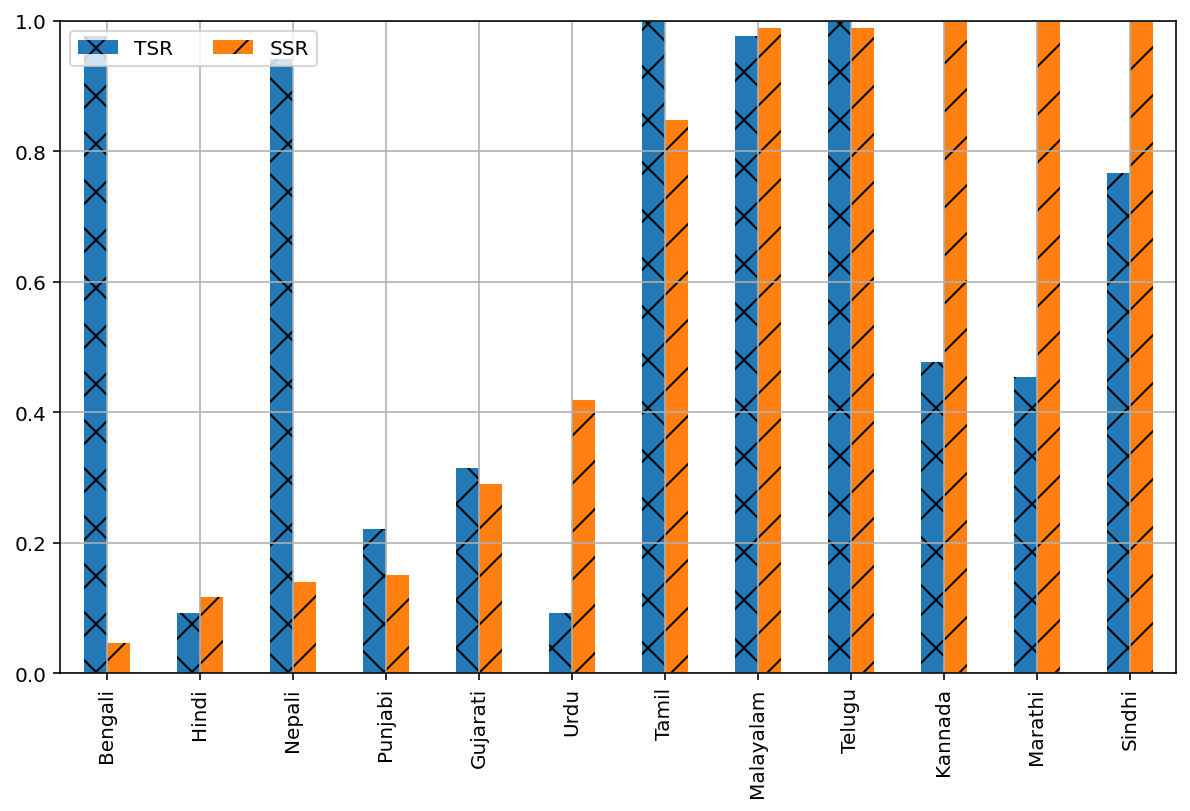

In [11]:
df_psr=df_tsr.merge(df_SSR,on='language',how='outer');
df_psr=df_psr.sort_values(by='SSR')
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
df_psr.plot(ax=ax,kind='bar',legend=False,alpha=.99);
bars = ax.patches
hatches = ''.join(h*len(df_psr) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xticks(np.arange(12),df_psr.language,rotation=90);
plt.ylim([0,1]);
plt.grid('On')
ax.legend(ncol=2)
plt.savefig("tsr_sorted_indian.pdf", bbox_inches = 'tight',alpha=.99,
    pad_inches = 0)

In [12]:
df_psr=df_psr.loc[:,['language', 'SSR', 'TSR']]
df_psr['SSR']=np.round(df_psr['SSR'].values.astype('float'),3)
df_psr['TSR']=np.round(df_psr['TSR'].values.astype('float'),3)
df_psr

,language,SSR,TSR
0,Bengali,0.047,0.977
2,Hindi,0.116,0.093
6,Nepali,0.140,0.942
7,Punjabi,0.151,0.221
1,Gujarati,0.291,0.314
11,Urdu,0.419,0.093
9,Tamil,0.849,1.000
4,Malayalam,0.988,0.977
10,Telugu,0.988,1.000
3,Kannada,1.000,0.477


In [13]:
print(df_she.shape,df_they.shape)
df_comb=pd.concat([df_she,df_they],axis=0)
df_pr=df_comb.applymap(lambda x:x.split(' ')[0].replace("'s","").replace("’s",""))
df_pr

(86, 25) (86, 25)


,original,En2bn,bn2En,En2gu,gu2En,En2hi,hi2En,En2kn,kn2En,En2ml,ml2En,En2mr,mr2En,En2ne,ne2En,En2pa,pa2En,En2sd,sd2En,En2ta,ta2En,En2te,te2En,En2ur,ur2En
0,She,তিনি,He,તે,He,वह,He,ಅವಳು,She,അവൾ,She,ती,She,उनी,He,ਉਹ,He,هوءَ,She,அவள்,She,ఆమె,She,وہ,He
1,She,তিনি,He,તે,He,वह,He,ಅವಳು,She,അവൾ,She,ती,She,उनी,He,ਉਹ,He,هوءَ,She,அவள்,She,ఆమె,She,وہ,He
2,She,তিনি,He,તે,He,वह,He,ಅವಳು,She,അവൾ,She,ती,She,उनी,He,ਉਹ,He,هوءَ,She,அவர்,He,ఆమె,She,وہ,He
3,She,সে,He,તે,He,वह,she,ಅವಳು,She,അവൾ,She,ती,She,उनी,He,ਉਹ,He,هوءَ,She,அவள்,She,ఆమె,She,وہ,She
4,She,তিনি,He,તે,He,वह,He,ಅವಳು,She,അവൾ,She,ती,She,उनी,He,ਉਹ,He,هوءَ,She,அவள்,She,ఆమె,She,وہ,He
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,They,তারা,They,તેઓ,He,वे,He,ಅವರು,He,അവർ,They,ते,They,तिनीहरू,They,ਉਹ,He,اهي,He,அவர்கள்,They,వారు,They,وہ,He
82,They,তারা,They,તેઓ,They,वे,He,ಅವರು,He,അവർ,They,ते,He,तिनीहरू,They,ਉਹ,He,اهي,They,அவர்கள்,They,వారు,They,وہ,They
83,They,তারা,They,તેઓ,He,वे,He,ಅವರು,He,അവർ,They,ते,He,तिनीहरू,They,ਉਹ,She,اهي,He,அவர்கள்,They,వారు,They,وہ,She
84,They,তারা,They,તેઓ,They,वे,He,ಅವರು,He,അവർ,They,ते,He,तिनीहरू,They,ਉਹ,He,اهي,They,அவர்கள்,They,వారు,They,وہ,He


bn2En     He  She  They
original               
She       82    4     0
They       0    2    84
ne2En     He  She  They
original               
She       74   12     0
They       4    1    81
kn2En     He  She  They
original               
She        0   86     0
They      44    1    41
mr2En     He  She  They
original               
She        0   86     0
They      46    1    39


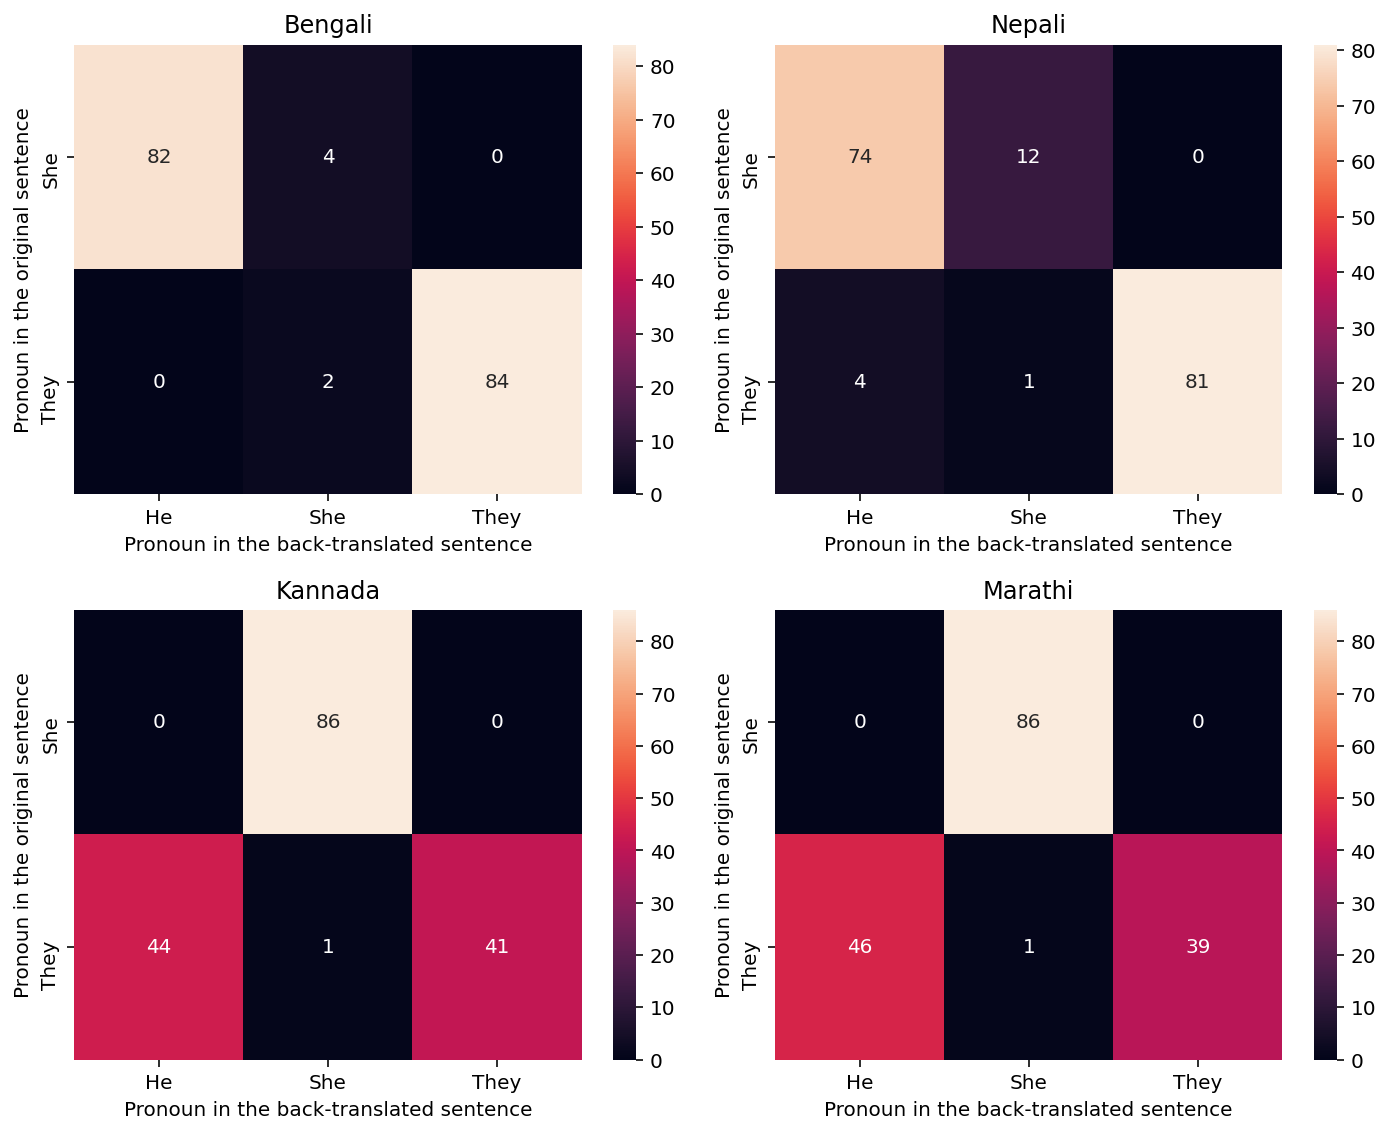

In [14]:
import seaborn as sns
plt.figure(figsize=(10,8))
lang_=['Bengali','Nepali','Kannada','Marathi']
for i,col in enumerate(['bn2En','ne2En','kn2En','mr2En']):
  plt.subplot(2,2,i+1)
  sns.heatmap(pd.crosstab(df_pr.original,df_pr.loc[:,col]),annot=True)
  print(pd.crosstab(df_pr.original,df_pr.loc[:,col]))
  plt.xlabel('Pronoun in the back-translated sentence')
  plt.title(lang_[i])
  plt.ylabel('Pronoun in the original sentence')
plt.tight_layout()

plt.savefig("crosstab_ind.pdf", bbox_inches = 'tight', pad_inches = 0)